In [30]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d as gaussf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [12]:
path_data_st = "./DATA/ST/data/"
dir_list = os.listdir(path_data_st)
print(dir_list,"\n")
print("Elementos dentro de la carpeta data de ST:",len(dir_list))

['data_ST_0.txt', 'data_ST_1.txt', 'data_ST_10.txt', 'data_ST_11.txt', 'data_ST_12.txt', 'data_ST_13.txt', 'data_ST_14.txt', 'data_ST_15.txt', 'data_ST_16.txt', 'data_ST_17.txt', 'data_ST_18.txt', 'data_ST_19.txt', 'data_ST_2.txt', 'data_ST_20.txt', 'data_ST_21.txt', 'data_ST_22.txt', 'data_ST_23.txt', 'data_ST_24.txt', 'data_ST_25.txt', 'data_ST_26.txt', 'data_ST_27.txt', 'data_ST_28.txt', 'data_ST_29.txt', 'data_ST_3.txt', 'data_ST_30.txt', 'data_ST_31.txt', 'data_ST_32.txt', 'data_ST_33.txt', 'data_ST_34.txt', 'data_ST_35.txt', 'data_ST_36.txt', 'data_ST_37.txt', 'data_ST_38.txt', 'data_ST_39.txt', 'data_ST_4.txt', 'data_ST_40.txt', 'data_ST_41.txt', 'data_ST_42.txt', 'data_ST_43.txt', 'data_ST_44.txt', 'data_ST_45.txt', 'data_ST_46.txt', 'data_ST_47.txt', 'data_ST_48.txt', 'data_ST_49.txt', 'data_ST_5.txt', 'data_ST_50.txt', 'data_ST_51.txt', 'data_ST_52.txt', 'data_ST_53.txt', 'data_ST_54.txt', 'data_ST_55.txt', 'data_ST_56.txt', 'data_ST_57.txt', 'data_ST_58.txt', 'data_ST_59.txt

In [32]:
df_list = []
for elem in dir_list:
    df_temp = pd.read_csv(path_data_st+elem,sep="\t")
    df_temp["filtered_p"] = gaussf(df_temp["p"], sigma=5.0)
    df_list.append(df_temp)

In [33]:
df_list[0]

,wl,p,filtered_p
0,14.000000,0.146112,0.147559
1,13.980427,0.148216,0.147561
2,13.960909,0.148814,0.147565
3,13.941446,0.147296,0.147571
4,13.922037,0.147875,0.147579
...,...,...,...
32615,0.300036,0.144468,0.144468
32616,0.300027,0.144468,0.144468
32617,0.300018,0.144468,0.144468
32618,0.300009,0.144468,0.144468


In [79]:
def graph(x,y,y_f):
    wl_ticks = np.arange(0.3,14.5,3)
    plt.figure(-3, (7,4))
    plt.clf()
    ax = plt.subplot(111)
    plt.semilogx(x, y, "-", color='orange', lw=1.0)
    plt.semilogx(x, y_f, color="blue", lw=1.25)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(wl_ticks)
    plt.xlim(0.3, 14.0)
    plt.ylabel("Transit depth (Rp/Rs)$^2$ (%)")
    plt.xlabel("Wavelength (um)")
    plt.show()

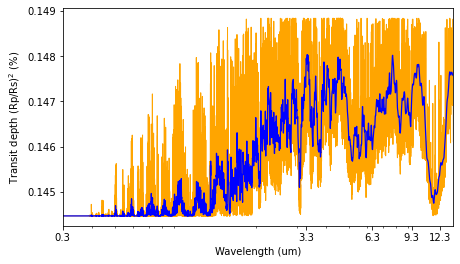

In [80]:
graph(df_list[0].wl,df_list[0].p,df_list[0].filtered_p)

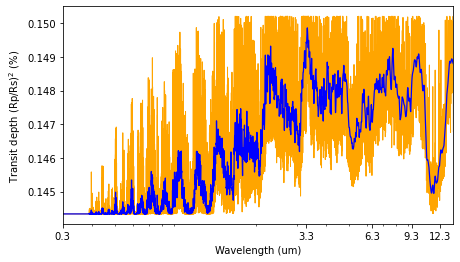

In [81]:
graph(df_list[1].wl,df_list[1].p,df_list[1].filtered_p)

In [98]:
f = []
x = []
for elem in df_list:
    x_temp = elem.wl
    y_temp = elem.filtered_p
    f.append(interp1d(x_temp,y_temp,kind='cubic'))

In [99]:
x_new = np.linspace(min(df_list[0].wl),max(df_list[0].wl),3000,endpoint=True)
data_spec = [i(x_new) for i in f]

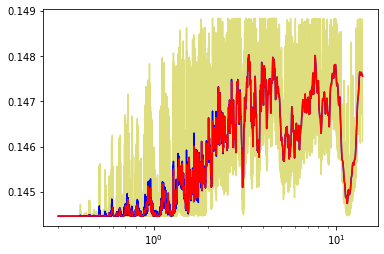

In [100]:
plt.semilogx(df_list[0].wl,df_list[0].p,color="y",alpha=0.5)
plt.semilogx(df_list[0].wl,df_list[0].filtered_p, color="blue")
plt.semilogx(x_new,data_spec[0],color="r")


In [102]:
data = pd.DataFrame(data_spec,columns=x_new)
data.insert(0,"exoplanet_type","ST")
data.head()

,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,ST,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,...,0.147566,0.147565,0.147564,0.147563,0.147562,0.147561,0.147561,0.147560,0.147560,0.147559
1,ST,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,...,0.148811,0.148808,0.148806,0.148804,0.148802,0.148800,0.148798,0.148797,0.148796,0.148796
2,ST,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,...,0.147843,0.147842,0.147841,0.147840,0.147839,0.147838,0.147837,0.147836,0.147836,0.147835
3,ST,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,...,0.148317,0.148315,0.148314,0.148312,0.148311,0.148310,0.148309,0.148308,0.148308,0.148307
4,ST,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,...,0.148239,0.148237,0.148234,0.148232,0.148230,0.148229,0.148227,0.148226,0.148225,0.148225
